In [54]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report, roc_auc_score, roc_curve
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
import warnings
warnings.filterwarnings("ignore")


In [55]:
data = pd.read_excel("/content/heart_disease.xlsx")

In [56]:
data.head()

,age,Age in years
0,Gender,"Gender ; Male - 1, Female -0"
1,cp,Chest pain type
2,trestbps,Resting blood pressure
3,chol,cholesterol measure
4,fbs,(fasting blood sugar > 120 mg/dl) (1 = true; 0...


In [57]:
xls = pd.ExcelFile("heart_disease.xlsx")
print(xls.sheet_names)


['Description', 'Heart_disease']


In [58]:
data = pd.read_excel(xls, sheet_name="Heart_disease")

In [59]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
0,63,Male,typical angina,145,233,True,lv hypertrophy,150,False,2.3,downsloping,fixed defect,0
1,41,Male,atypical angina,135,203,False,normal,132,False,0.0,flat,fixed defect,0
2,57,Male,asymptomatic,140,192,False,normal,148,False,0.4,flat,fixed defect,0
3,52,Male,typical angina,118,186,False,lv hypertrophy,190,False,0.0,flat,fixed defect,0
4,57,Male,asymptomatic,110,201,False,normal,126,True,1.5,flat,fixed defect,0


In [60]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 908 entries, 0 to 907
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       908 non-null    int64  
 1   sex       908 non-null    object 
 2   cp        908 non-null    object 
 3   trestbps  908 non-null    int64  
 4   chol      908 non-null    int64  
 5   fbs       908 non-null    bool   
 6   restecg   908 non-null    object 
 7   thalch    908 non-null    int64  
 8   exang     908 non-null    object 
 9   oldpeak   846 non-null    float64
 10  slope     908 non-null    object 
 11  thal      908 non-null    object 
 12  num       908 non-null    int64  
dtypes: bool(1), float64(1), int64(5), object(6)
memory usage: 86.1+ KB


In [61]:
data.describe()

,age,trestbps,chol,thalch,oldpeak,num
count,908.000000,908.000000,908.000000,908.000000,846.000000,908.000000
mean,53.791850,133.430617,201.484581,135.957048,0.891253,1.008811
std,9.158031,20.401608,112.097949,26.804929,1.093875,1.144436
min,29.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.750000,120.000000,176.750000,118.000000,0.000000,0.000000
50%,54.000000,130.000000,224.000000,138.000000,0.500000,1.000000
75%,60.000000,144.000000,270.000000,156.000000,1.500000,2.000000
max,77.000000,200.000000,603.000000,202.000000,6.200000,4.000000


In [62]:
data.nunique()

,0
age,49
sex,2
cp,4
trestbps,85
chol,228
fbs,2
restecg,3
thalch,122
exang,4
oldpeak,53


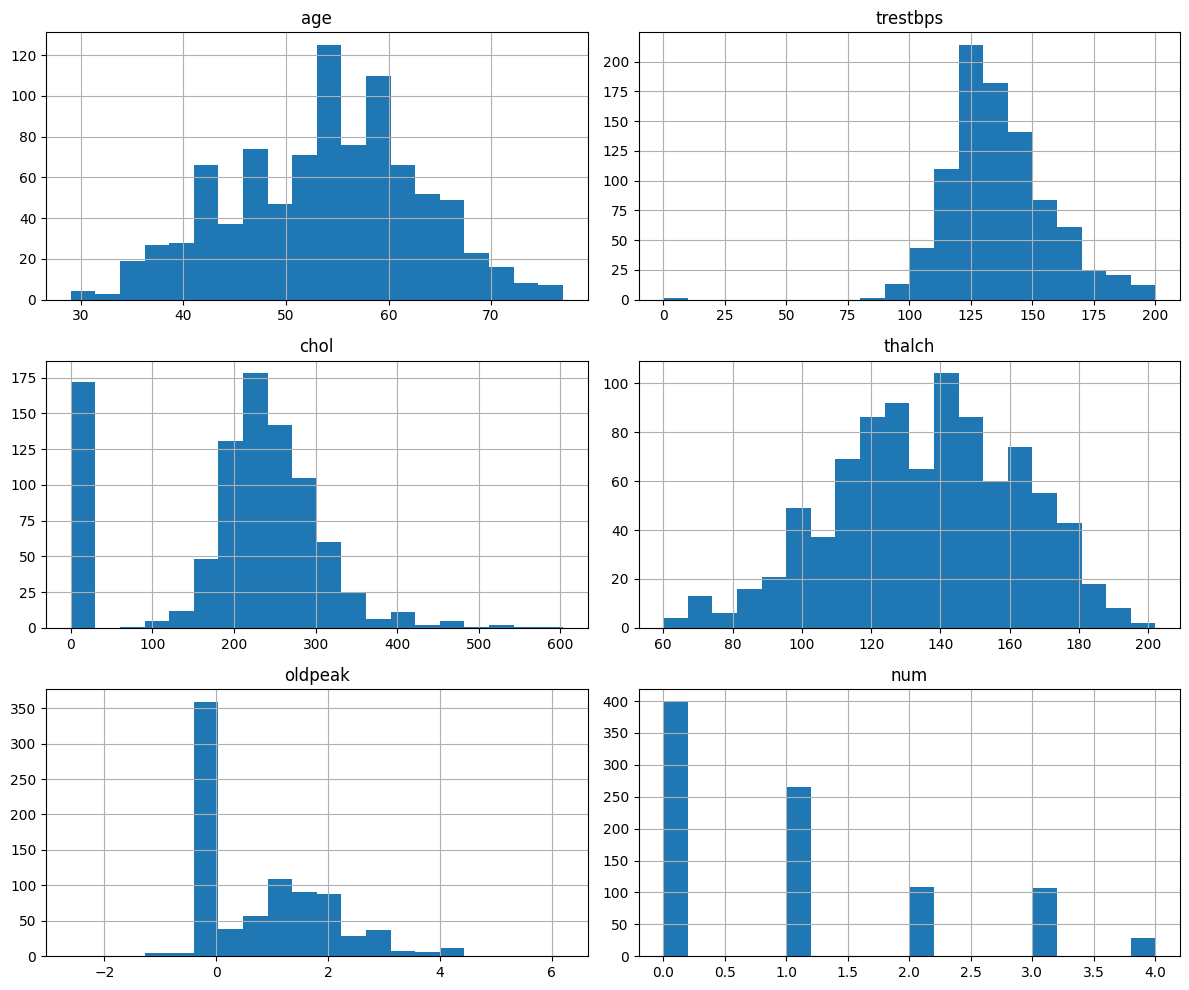

In [63]:
data.hist(figsize=(12, 10), bins=20)
plt.tight_layout()
plt.show()


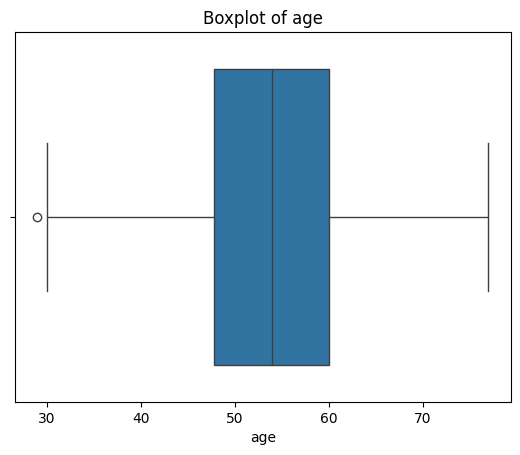

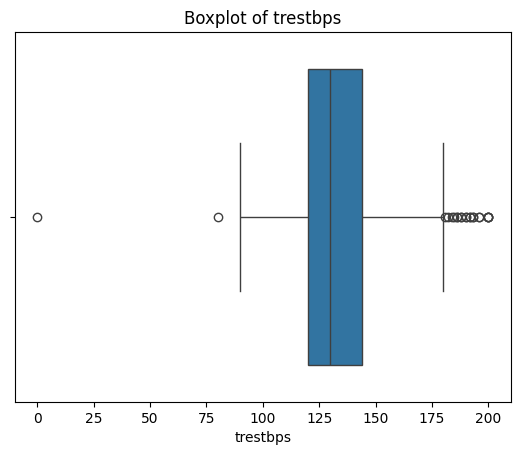

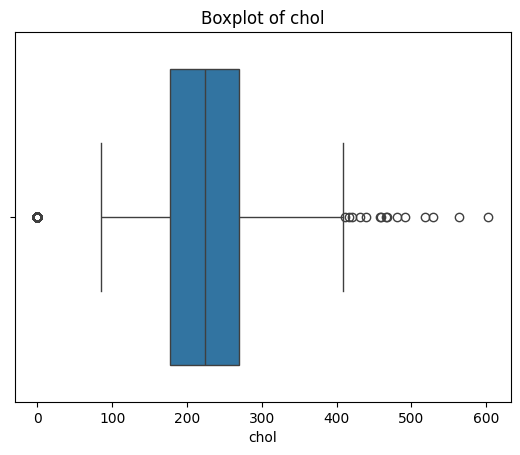

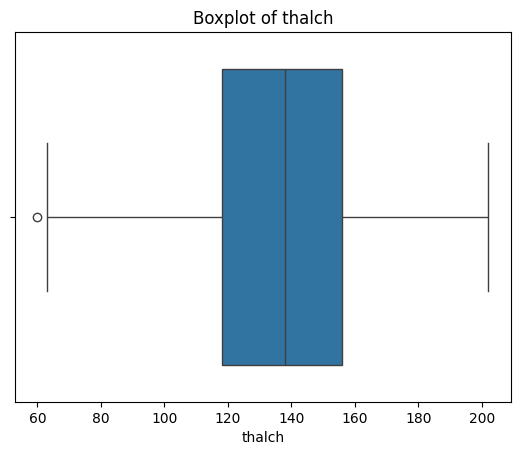

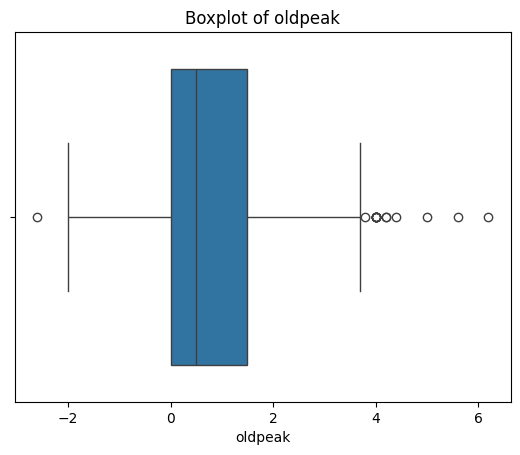

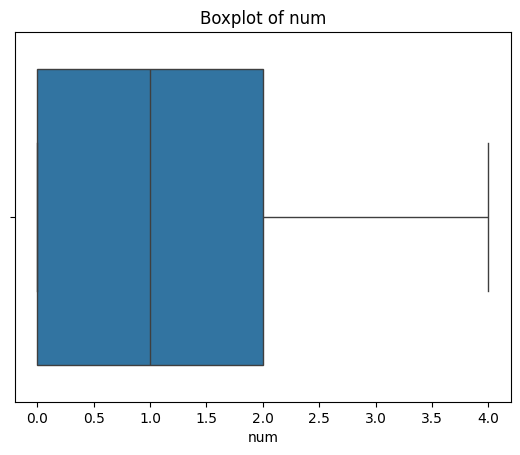

In [64]:
numerical_cols = data.select_dtypes(include=['int64', 'float64']).columns
for col in numerical_cols:
    sns.boxplot(x=data[col])
    plt.title(f'Boxplot of {col}')
    plt.show()


In [65]:
# column oldpeak had some null values since its slightly positively skewed we can handle that with median values
data['oldpeak'].fillna(data['oldpeak'].median(), inplace=True)


In [66]:
data["oldpeak"].isnull().sum()

np.int64(0)

In [67]:
data.isnull().sum()

,0
age,0
sex,0
cp,0
trestbps,0
chol,0
fbs,0
restecg,0
thalch,0
exang,0
oldpeak,0


In [68]:
data.describe()

,age,trestbps,chol,thalch,oldpeak,num
count,908.000000,908.000000,908.000000,908.000000,908.000000,908.000000
mean,53.791850,133.430617,201.484581,135.957048,0.864537,1.008811
std,9.158031,20.401608,112.097949,26.804929,1.060433,1.144436
min,29.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.750000,120.000000,176.750000,118.000000,0.000000,0.000000
50%,54.000000,130.000000,224.000000,138.000000,0.500000,1.000000
75%,60.000000,144.000000,270.000000,156.000000,1.500000,2.000000
max,77.000000,200.000000,603.000000,202.000000,6.200000,4.000000


In [69]:
# As we observe boxplots, columns 'trestbps', 'chol', and 'oldpeak' have outliers.
# Only 'chol' has extreme outliers, so I'm handling that column.
# The remaining are minor outliers, so I'm leaving those as-is.

# Capping extreme values in 'chol' using 1st and 99th percentiles
q_low = data['chol'].quantile(0.01)
q_high = data['chol'].quantile(0.99)
data['chol'] = data['chol'].clip(q_low, q_high)


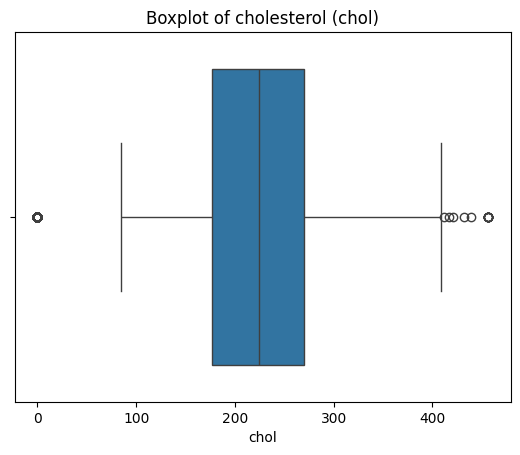

In [70]:
plt.figure()
sns.boxplot(x=data['chol'])
plt.title('Boxplot of cholesterol (chol)')
plt.xlabel('chol')
plt.show()


In [71]:
# Checking for invalid 0 s in key columns
# because people who are with 0 cholestrol and 0 rest blood pressure cant exist its not technically possible
data[['chol', 'trestbps']].loc[(data['chol'] == 0) | (data['trestbps'] == 0)]

,chol,trestbps
152,0.0,120
176,0.0,120
185,0.0,152
188,0.0,126
189,0.0,130
...,...,...
893,0.0,115
895,0.0,120
901,0.0,110
903,0.0,125


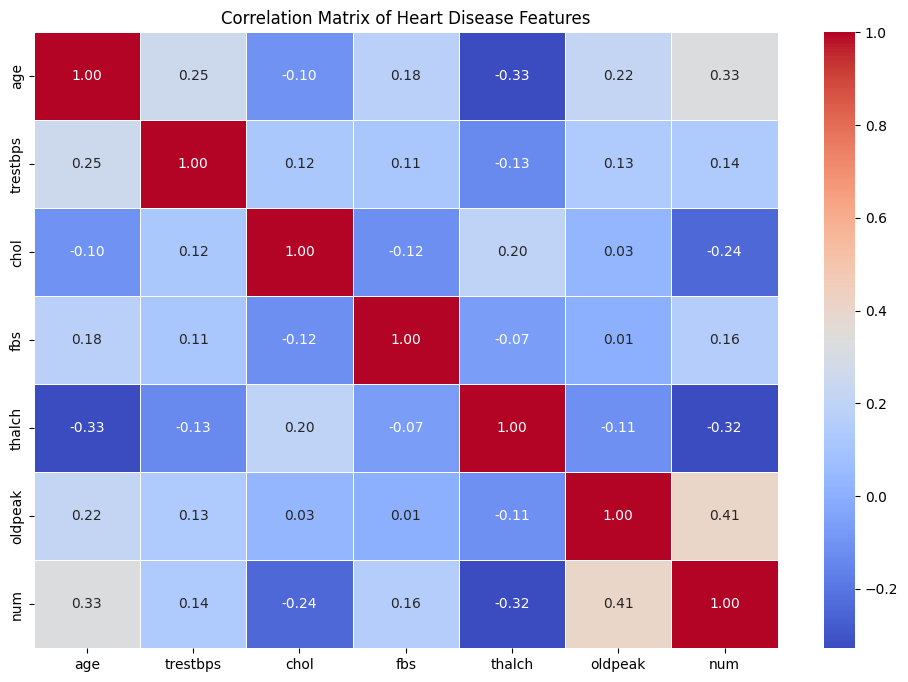

In [72]:
# Computing and visualizing the correlation matrix
corr_matrix = data.corr(numeric_only=True)

plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix of Heart Disease Features")
plt.show()


In [73]:
data

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
0,63,Male,typical angina,145,233.0,True,lv hypertrophy,150,False,2.3,downsloping,fixed defect,0
1,41,Male,atypical angina,135,203.0,False,normal,132,False,0.0,flat,fixed defect,0
2,57,Male,asymptomatic,140,192.0,False,normal,148,False,0.4,flat,fixed defect,0
3,52,Male,typical angina,118,186.0,False,lv hypertrophy,190,False,0.0,flat,fixed defect,0
4,57,Male,asymptomatic,110,201.0,False,normal,126,True,1.5,flat,fixed defect,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
903,53,Male,asymptomatic,125,0.0,False,normal,120,False,1.5,upsloping,reversable defect,4
904,62,Male,asymptomatic,166,170.0,False,st-t abnormality,120,True,3.0,flat,reversable defect,4
905,56,Male,non-anginal,170,0.0,False,lv hypertrophy,123,True,2.5,downsloping,normal,4
906,56,Male,non-anginal,144,208.0,True,st-t abnormality,105,TURE,0.5,downsloping,fixed defect,4


In [74]:
original_data = data.copy()


In [75]:
data.dtypes

,0
age,int64
sex,object
cp,object
trestbps,int64
chol,float64
fbs,bool
restecg,object
thalch,int64
exang,object
oldpeak,float64


In [76]:
# converting sex column to numbers: Male → 1, Female → 0
data['sex'] = data['sex'].map({'Male': 1, 'Female': 0})

# fixing exang values manually and converting to 1/0
data['exang'] = data['exang'].replace({'TURE': 1, 'TRUE': 1, 'True': 1, 'FALSE': 0, 'False': 0})

# fbs is boolean, converting it to int
data['fbs'] = data['fbs'].astype(int)
data['exang'] = data['exang'].astype(int)

In [77]:
# encoding cp, restecg, slope, thal using one-hot
object_cols = ['cp', 'restecg', 'slope', 'thal']
data = pd.get_dummies(data, columns=object_cols, drop_first=True)

In [78]:
# filling missing values in chol and oldpeak with median
data['chol'] = data['chol'].fillna(data['chol'].median())
data['oldpeak'] = data['oldpeak'].fillna(data['oldpeak'].median())

In [79]:
# scaling numerical columns for consistency (optional for tree models)
from sklearn.preprocessing import StandardScaler
num_cols = ['age', 'trestbps', 'chol', 'thalch', 'oldpeak']
scaler = StandardScaler()
data[num_cols] = scaler.fit_transform(data[num_cols])

In [80]:
data

,age,sex,trestbps,chol,fbs,thalch,exang,oldpeak,num,cp_atypical angina,cp_non-anginal,cp_typical angina,restecg_normal,restecg_st-t abnormality,slope_flat,slope_upsloping,thal_normal,thal_reversable defect
0,1.006027,1,0.567394,0.289553,1,0.524183,0,1.354403,0,False,False,True,False,False,False,False,False,False
1,-1.397560,1,0.076967,0.018380,0,-0.147705,0,-0.815718,0,True,False,False,True,False,True,False,False,False
2,0.350503,1,0.322181,-0.081050,0,0.449529,0,-0.438305,0,False,False,False,True,False,True,False,False,False
3,-0.195767,1,-0.756760,-0.135285,0,2.017268,0,-0.815718,0,False,False,True,False,False,True,False,False,False
4,0.350503,1,-1.149102,0.000302,0,-0.371668,1,0.599578,0,False,False,False,True,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
903,-0.086513,1,-0.413461,-1.816556,0,-0.595631,0,0.599578,4,False,False,False,True,False,False,True,False,True
904,0.896773,1,1.597292,-0.279910,0,-0.595631,1,2.014874,4,False,False,False,False,True,True,False,False,True
905,0.241249,1,1.793463,-1.816556,0,-0.483649,1,1.543109,4,False,True,False,False,False,False,False,True,False
906,0.241249,1,0.518352,0.063575,1,-1.155538,1,-0.343952,4,False,True,False,False,True,False,False,False,False


In [81]:
original_data

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
0,63,Male,typical angina,145,233.0,True,lv hypertrophy,150,False,2.3,downsloping,fixed defect,0
1,41,Male,atypical angina,135,203.0,False,normal,132,False,0.0,flat,fixed defect,0
2,57,Male,asymptomatic,140,192.0,False,normal,148,False,0.4,flat,fixed defect,0
3,52,Male,typical angina,118,186.0,False,lv hypertrophy,190,False,0.0,flat,fixed defect,0
4,57,Male,asymptomatic,110,201.0,False,normal,126,True,1.5,flat,fixed defect,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
903,53,Male,asymptomatic,125,0.0,False,normal,120,False,1.5,upsloping,reversable defect,4
904,62,Male,asymptomatic,166,170.0,False,st-t abnormality,120,True,3.0,flat,reversable defect,4
905,56,Male,non-anginal,170,0.0,False,lv hypertrophy,123,True,2.5,downsloping,normal,4
906,56,Male,non-anginal,144,208.0,True,st-t abnormality,105,TURE,0.5,downsloping,fixed defect,4


In [82]:
# taking all columns except 'num' as input features
X = data.drop('num', axis=1)

# 'num' is the target we're predicting
y = data['num']

In [83]:
# splitting data into train and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [84]:
# training the decision tree on training data
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [85]:
# predicting on test data
y_pred = model.predict(X_test)

In [86]:
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred, average='macro')
rec = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

In [87]:
y_pred

array([3, 3, 0, 2, 0, 1, 0, 0, 1, 2, 3, 2, 0, 0, 0, 2, 0, 1, 0, 2, 0, 1,
       1, 3, 0, 3, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 3, 0, 3, 4, 0, 0, 0,
       0, 0, 0, 0, 0, 2, 2, 0, 0, 1, 1, 1, 2, 0, 1, 3, 0, 0, 1, 0, 0, 1,
       1, 1, 0, 1, 0, 3, 3, 3, 0, 2, 1, 3, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 3, 3, 2, 0, 0, 0, 1, 3, 0, 0, 0, 0, 2, 2, 0, 0, 1, 1, 1, 1, 3,
       2, 0, 0, 0, 0, 2, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 3, 1, 0, 0,
       1, 1, 0, 0, 0, 2, 2, 0, 1, 0, 0, 4, 0, 0, 1, 0, 1, 0, 3, 0, 1, 0,
       2, 3, 3, 0, 1, 0, 0, 1, 0, 0, 0, 1, 3, 1, 0, 1, 0, 2, 0, 0, 0, 4,
       1, 1, 1, 1, 1, 0])

In [88]:
print(acc)
print(prec)
print(rec)
print(f1)

0.5054945054945055
0.3262857142857143
0.3299420176650844
0.3268830896074984


In [89]:

# We are defining the hyperparameters we want to test
param_grid = {
    'max_depth': [3, 5, 9, None],
    'min_samples_split': [2, 5, 10],
    'criterion': ['gini', 'entropy']
}

# We are setting up GridSearchCV to find the best combination
grid_search = GridSearchCV(
    DecisionTreeClassifier(random_state=42),
    param_grid,
    cv=5,
    scoring='accuracy'
)

# We are training the model using grid search
grid_search.fit(X_train, y_train)

# We are extracting the best model and its parameters
best_model = grid_search.best_estimator_
print("Best Parameters:", grid_search.best_params_)

Best Parameters: {'criterion': 'gini', 'max_depth': 3, 'min_samples_split': 2}


In [90]:
y_pred = best_model.predict(X_test)

acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred, average='macro')
rec = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

print("Accuracy:", acc)
print("Precision:", prec)
print("Recall:", rec)
print("F1 Score:", f1)

Accuracy: 0.5439560439560439
Precision: 0.24287841107107208
Recall: 0.2875743555849306
F1 Score: 0.2631751978694675


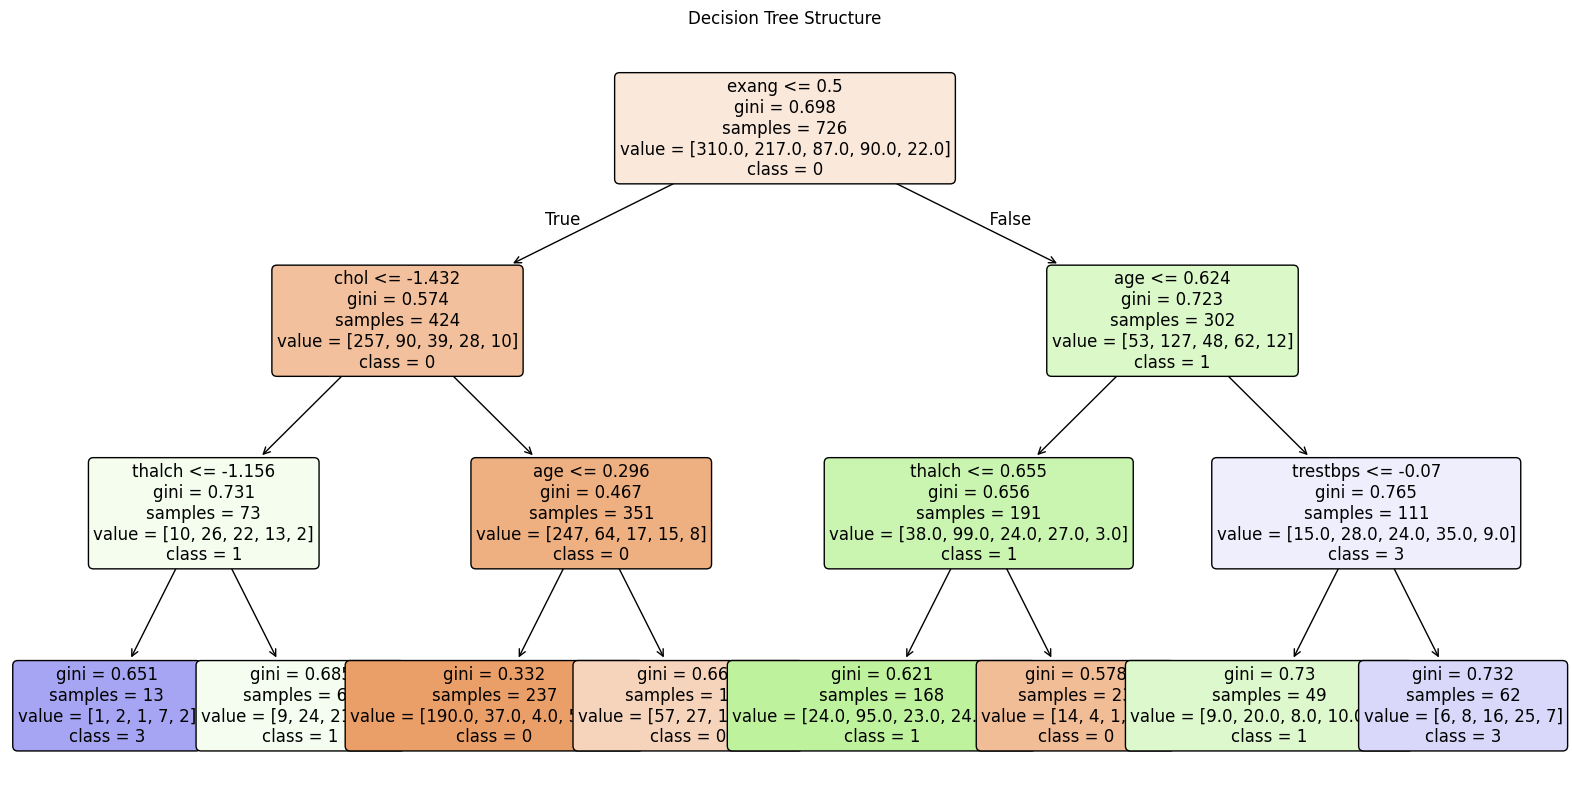

In [91]:
# Drawing the decision tree to reveal the model’s decision-making flow
plt.figure(figsize=(20, 10))
plot_tree(
    best_model,
    feature_names=X_train.columns,
    class_names=[str(cls) for cls in best_model.classes_],
    filled=True,
    rounded=True,
    fontsize=12
)
plt.title("Decision Tree Structure")
plt.show()

In [92]:
feature_importance = pd.Series(best_model.feature_importances_, index=X_train.columns)
feature_importance = feature_importance.sort_values(ascending=False)

print("Top Features:\n", feature_importance)


Top Features:
 exang                       0.432233
chol                        0.253914
age                         0.165503
thalch                      0.111412
trestbps                    0.036938
fbs                         0.000000
sex                         0.000000
oldpeak                     0.000000
cp_atypical angina          0.000000
cp_non-anginal              0.000000
cp_typical angina           0.000000
restecg_normal              0.000000
restecg_st-t abnormality    0.000000
slope_flat                  0.000000
slope_upsloping             0.000000
thal_normal                 0.000000
thal_reversable defect      0.000000
dtype: float64
